In [3]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import noisereduce as nr  # For noise reduction

c:\Users\rjars\Desktop\sound-localization\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
left_mic_recording = r'./left_mic.wav'
right_mic_recording = r'./right_mic.wav'

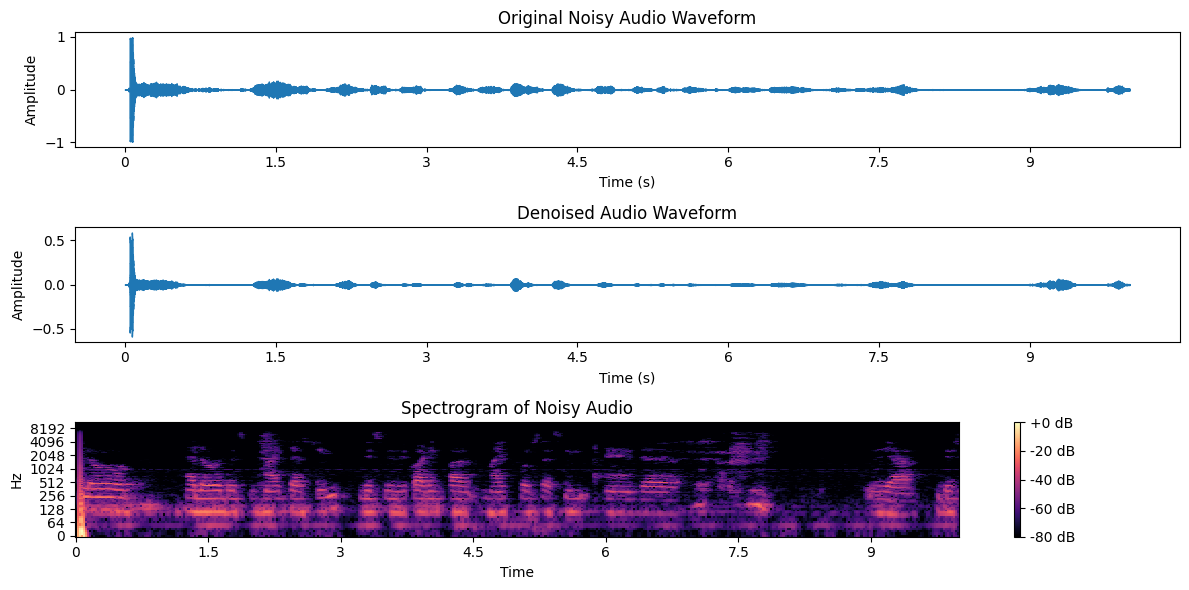

In [7]:
y_left, sr_left = librosa.load(left_mic_recording)

# Plot the original waveform
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
librosa.display.waveshow(y_left, sr=sr_left)
plt.title('Original Noisy Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Estimate noise from the beginning (assuming first 0.5 seconds is noise)
noise_profile = y_left[:int(0.5 * sr_left)]

# Perform noise reduction
reduced_noise = nr.reduce_noise(y=y_left, sr=sr_left, y_noise=noise_profile)

# Plot the reduced noise waveform
plt.subplot(3, 1, 2)
librosa.display.waveshow(reduced_noise, sr=sr_left)
plt.title('Denoised Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot spectrogram for both noisy and cleaned audio
plt.subplot(3, 1, 3)
D_noisy = librosa.amplitude_to_db(np.abs(librosa.stft(y_left)), ref=np.max)
D_cleaned = librosa.amplitude_to_db(np.abs(librosa.stft(reduced_noise)), ref=np.max)
librosa.display.specshow(D_noisy, sr=sr_left, x_axis='time', y_axis='log')
plt.title('Spectrogram of Noisy Audio')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

# Show the plots
plt.show()
